# 降维方法 Dimensionality Reduction
- 机器学习问题涉及训练实例的几千甚至百万级别
- 导致训练非常缓慢，难以找到很好的解决方案，这个问题称之为维度的诅咒
- 现实世界问题，可以大量减少特征的数量，例如 MNIST 图像：图像边框像素几乎全是白色，可以舍掉，并且不会丢失信息
- 而且两个相邻像素通常是高度相关的，将其合并为一个像素（平均值），也不会丢失太多信息
- 数据降维肯定会丢失一些信息，但是能够加快训练，轻微降低系统性能
- 降维对于数据可视化（DataViz）非常有用，将维度降到两到三个，可以在图形上绘制出高维度训练集，通过视觉来检测模式，可以获得非常重要的洞察，如聚类
- 了解维度的诅咒，了解高维空间发生的事情
- 数据降维方法
    - 投影
    - 流形学习
- 数据降维技术
    - PCA
    - Kernal PCA
    - LLE
    

## 维度的诅咒
- 大脑直觉思维难以想象超过三维的空间
- 事实证明，在高维空间中，许多事物的行为都迥然不同
- 随机选择一个点，在不同的维度空间中其概率不同，高维超立方体重大多数点都非常接近边界
- 随机计算亮点平均距离，在不同的维度空间中其值差异很大，高维度数据是非常稀疏的
- 训练集维度越高，过度拟合的风险就越大
- 理论上，增大训练集，使得训练实例达到足够的密度，可以解开维度的诅咒
- 实践中，要达到给定密度所需的训练实例数量随着维度的增加呈指数式上升，也即是无法达到这个要求
- 解开 维度的诅咒，需要对数据维度进行降维处理


## 数据降维主要方法
### 投影 projection methods
- 实际问题中，训练实例在所有维度上并不是均匀分布的，许多特征几乎是不变的，而且许多特征时高度相关联的
- 简单来说，高维空间的所有训练实例受一个低得多的低维度字空间所影响
- 一个三维数据集，所有的训练实例都紧挨着一个平面：这就是高维（3D）空间的低维（2D）子空间
- 投影并不总是降维的最佳方法，在许多情况下，子空间可能弯曲或者转动，著名数据集，瑞士卷玩具数据集
- 瑞士卷数据集，通过简单的平面投影，会直接将瑞士卷的不同层压扁在一起

### 流形学习 Manifold learning
- 瑞士卷就是一个二维流形的例子，简单而言，2D 流形就是一个能够在高维空间里面弯曲和扭转的 2D 形状
- d 维流形就是 n（d<n）维空间的一部分，局部类似于一个 d 维超平面
- 许多降维算法就是通过对训练实例进行流形建模来实现，这称之为流形学习
- 流形学习依赖于流形假设（流形假说），认为大多数现实世界的高维度数据集存在一个低维度的流形来重新表示，这个假设通常是经验观察
- 流形假设：现实世界中，实际拥有的自由度比起理想的任意自由度要低得多，这一系列的限制正倾向于将数据集挤压成更低维度的流形
- 流形假设通常伴随一个隐含的假设：如果能用低维度空间的流形表示，任务将会变得简单，但是这个假设不总是成立，取决于实际数据集

### summary
- 训练模型之前降低训练集维度，可能能够加快训练速度，但这不总是导致更好或者更简单的解决方案，实际取决于数据集情况


## 数据降维技术
### PCA
- 主成分分析（PCA）是最流行的降维算法，显示识别出最接近数据的超平面，然后将数据投影在其上
- 保留差异性
    - 将训练集投影到低维度超平面之前，需要选择正确的超平面
    - 保留差异性，就是让投影丢失的信息更加少
    - 证明方法：比较原始数据集与其轴上的投影之间的均方距离最小化，也就是最合理的选择
- 主成分
    - 主成分分析可以在训练集中识别出那条轴对差异性的贡献最高
    - 定义第 i 条轴的单位向量叫作第 i 个主成分
    - 主成分方向是不稳定的，打乱数据集，部分重新的主成分可能跟原来的主成分方向有所差异，但是确定的子投影空间是一定的
- 寻找主成分
    - 标准的矩阵分解技术，奇异值分解 SVD
    - 将训练集矩阵 X 分解成三个矩阵的点积，其中包含着需要的所有主成分
- 低维度投影
    - 一旦确定了所有主成分，可以将数据集投影到有前 d 个主成分定义的超平面上，从而将原始数据维度 n 降到 d
    - 这个超平面的选择，能确保投影尽可能保留多的差异性
    - 在保留尽可能多差异性的同时，将任意数据集降低到任意维度
- 自己可以定义实现 PCA，sklearn 提供了实现（自动处理数据集中）
- 方差解释率
    - 非常有用的效率是每个主成分的方差解释率
    - 表示每个主成分轴对整个数据集的方差的贡献率
- 选择正确数量的维度
    - 除非有了明确的维度需求，不然就需要选择正确并且合理的维度数量
    - solution：将靠前的主成分方差解释率一次相加，直到得到足够大比例的方差，这时维度数量就是很好的选择
    - 还可以将解释方差绘制成关于维度数量的函数，可视化分析
- PCA 压缩
    - 降维之后训练集占用的空间要小得多，保留绝大部分差异性，一个合理的压缩比，提高算法的速度
    - 在 PCA 投影上运行投影的逆转换，可以将压缩的数据集解压到原来的数据集
    - 由于投影时损失了信息，得到并非原始数据，但是尽可能大的接近原始数据
    - 原始数据和重建数据之间的均方距离，称之为重建误差
- 增量 PCA
    - 训练算法需要将训练集数据进入内存，才能训练算法
    - 增量主成分分析（IPCA）算法：将训练集分成一个个小批量，一次给 IPCA 算法一个
    - 对于大型数据集而言，这个是很有效的方法
    - numpy 的 memmap 类，巧妙操控储存在磁盘的二进制文件，类似在内存中一样
- 随机 PCA
    - 这是一个随机算法
    - 可以快速找到前 d 个主成分的近似值，计算复杂度要低一些，运行效率要高
    
### 核主成分分析
- 一种数学技巧，隐性地将实例映射到非常高维的空间（称之为特征空间），从而使得 SVM 能够进行非线性分类和回归
- 高维特征空间的线性决策边界如何应对原始空间中复杂的非线性决策边界
- 相同的技巧应用于 PCA ，使得复杂的非线性投影降维成为可能，这就是核成分分析（kPCA）
- 擅长在投影之后保留实例的集群，有时能够近似于一个扭曲流形的数据集
- 选择核函数和调整超参数
    - 由于 kPCA 是一种无监督学习算法，因此没有明显的性能指标来选择最佳的核函数和超参数值
    - 可以使用网格搜索，找到使任务性能最佳的核函数和超参数
    - 还有一种完全不受监督方法，就是选择重建误差最低的核函数和超参数
    
### 局部线性嵌入 LLE
- 是一种非常强大的非线性降维（NLDR）技术
- 区别于 PCA 技术依赖于投影，LLE 依赖于流形学习方法
- LLE 首先测量每个算法如何与其最近的邻居线性相关，然后为训练集寻找一个能最大程度保留这些局部关系的降维表示
- 这使得 LLE 特别擅长展开弯曲的流形，特别是没有太多的噪声时

### 其他降维技巧
- 多维度缩放（MDS）算法，保持实例之间距离，降低维度
- 等度量映射（Isomap）算法，将每个实例与其最近的邻居连接起来，创建连接图形，然后保留实例之间的这个测地距离，降低维度
- t-分布随机近邻嵌入（t-SNE）算法，在降低维度时，试图让相似的实例彼此靠近，不相似的实例彼此远离，主要用于可视化，尤其是将高维空间中的实例集群可视化
- 线性判别（LDA）算法，实际是一种分类算法，在训练过程中，学习类别之间最有区别的轴，而这个轴正好可以用来定义投影数据的超平面

In [5]:
# First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, 
# ensure MatplotLib plots figures inline and prepare a function to save the figures:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    

In [6]:
# Projection methods

# Build 3D dataset:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


Note: the `svd()` function returns `U`, `s` and `Vt`, where `Vt` is equal to $\mathbf{V}^T$, the transpose of the matrix $\mathbf{V}$. Earlier versions of the book mistakenly said that it returned `V` instead of `Vt`. Also, Equation 8-1 should actually contain $\mathbf{V}$ instead of $\mathbf{V}^T$, like this:

$
\mathbf{V} =
\begin{pmatrix}
  \mid & \mid & & \mid \\
  \mathbf{c_1} & \mathbf{c_2} & \cdots & \mathbf{c_n} \\
  \mid & \mid & & \mid
\end{pmatrix}
$

In [7]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [8]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [9]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [10]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [11]:
X2D_using_svd = X2D

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [13]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [14]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [15]:
np.allclose(X2D, -X2D_using_svd)

True

In [16]:
# Recover the 3D points projected on the plane (PCA 2D subspace).
X3D_inv = pca.inverse_transform(X2D)

In [17]:
np.allclose(X3D_inv, X)


False

In [18]:
# We can compute the reconstruction error:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

In [19]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [20]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [21]:
# The `PCA` object gives access to the principal components that it computed:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [ ]:
# Compare to the first two principal components computed using the SVD method:


In [22]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [23]:
# Now let's look at the explained variance ratio:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [24]:
# By projecting down to 2D, we lost about 1.1% of the variance:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

In [25]:
# Here is how to compute the explained variance ratio using the SVD approach (recall that `s` is the diagonal of the matrix `S`):
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

In [26]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [27]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

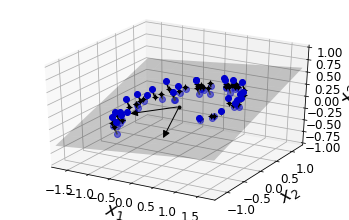

In [29]:
# Plot the 3D dataset, the plane and the projections on that plane.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

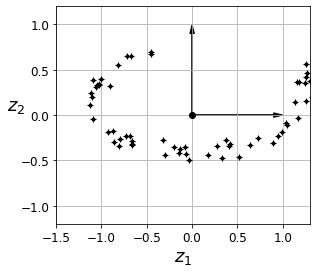

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)


In [32]:
# Manifold learning
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

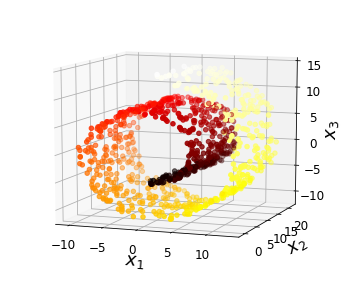

In [34]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

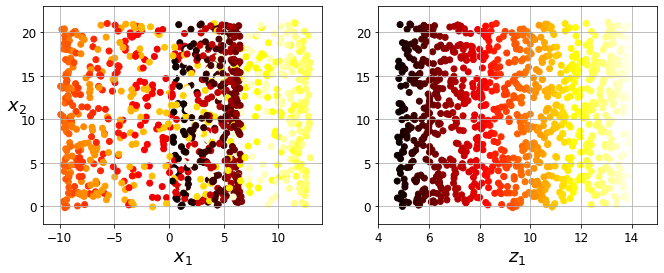

In [35]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

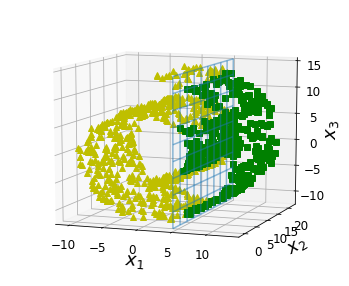

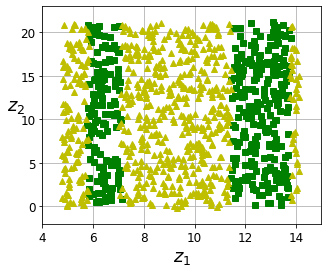

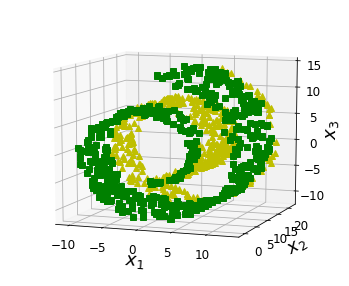

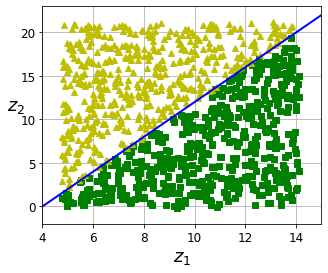

In [36]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

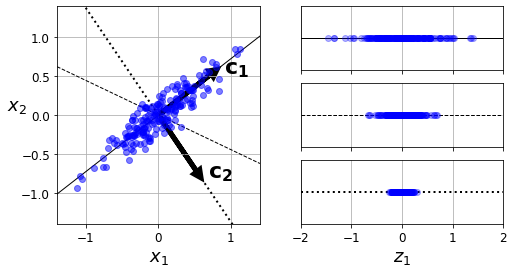

In [37]:
# PCA

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

In [38]:
# MNIST compression

# load dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

# split dataset
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


# using PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [39]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

pca.n_components_

154

In [40]:
np.sum(pca.explained_variance_ratio_)

0.9504334914295705

In [41]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [42]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

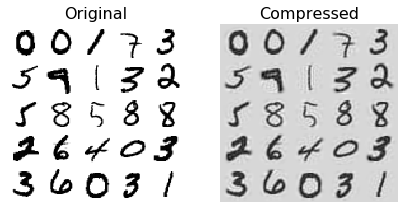

In [43]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [44]:
X_reduced_pca = X_reduced

In [45]:
# kPCA

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [46]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

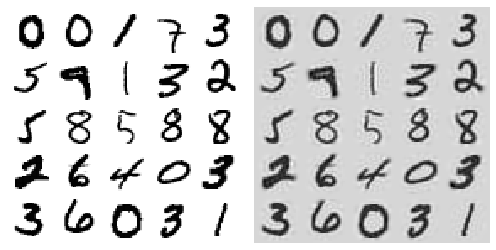

In [47]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [48]:
X_reduced_inc_pca = X_reduced

In [49]:
# Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means are equal: 
np.allclose(pca.mean_, inc_pca.mean_)

True

In [50]:
# But the results are not exactly identical. Incremental PCA gives a very good approximate solution, but it's not perfect:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

In [51]:
# Time complexity
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))


n_components = 2
    PCA: 7.5 seconds
    IncrementalPCA: 98.0 seconds
    PCA: 7.0 seconds
n_components = 10
    PCA: 9.8 seconds
    IncrementalPCA: 103.3 seconds
    PCA: 6.2 seconds
n_components = 154
    PCA: 20.2 seconds
    IncrementalPCA: 80.5 seconds
    PCA: 20.4 seconds


Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

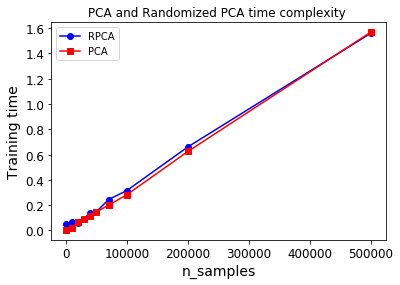

In [53]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

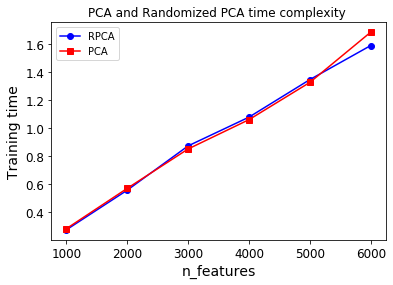

In [54]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

In [57]:
# Kernal PCA
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)


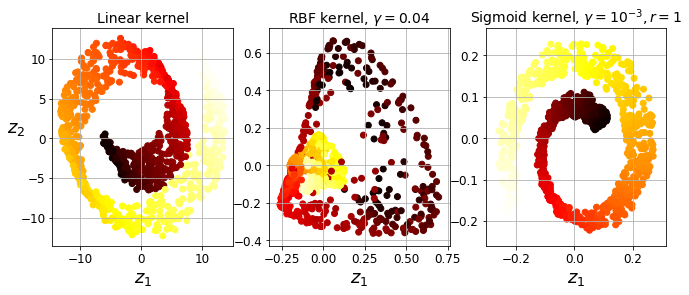

In [58]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

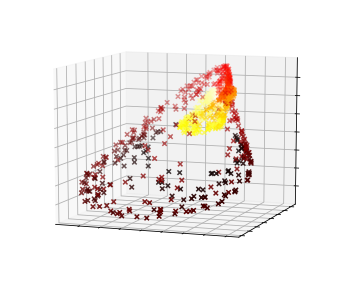

In [59]:
plt.figure(figsize=(6, 5))

X_inverse = pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

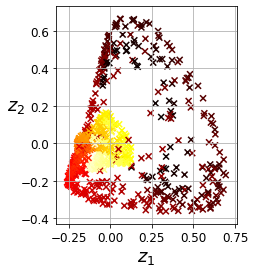

In [60]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\utils\extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [62]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [63]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [64]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576611

In [65]:
# LLE

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

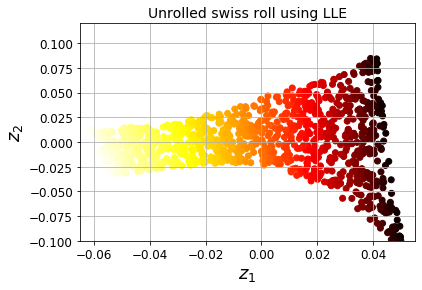

In [66]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

In [67]:
# MDS, Isomap and t-SNE

from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [68]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [69]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

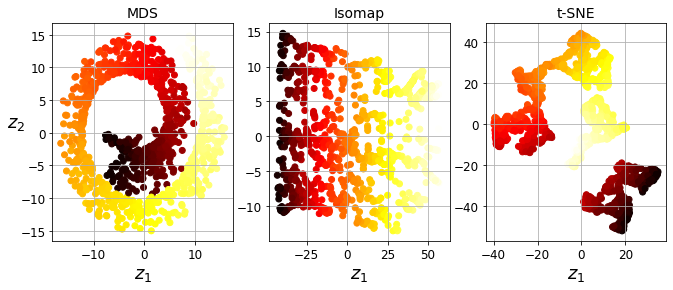

In [71]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

# 大数据分配作业 MapReduce 技术
- MapReduce
    - 分布式计算框架
    - Hadoop 是实现 MapReduce 计算框架的软件架构
    - map 和 reduce 作业，分布式集群作业    
- Python 中的 Hadoop 流使用
    - HDFS,GFS
    - 提供 Python 接口处理流，使用 Python 作业
- 使用 mrjob 库将 MapReduce 自动化
    - 使用 Python 的库 mrjob 自动执行 MapReduce
- 使用 pegasos 算法并行训练 支持向量机 SVM
    - 分布式 SVM 的 Pegasos 算法
- 大数据基本概述
    - Hadoop
    - MapReduce
    - Spark
    - Zookeeper
    - Flank
    - Kafka
- 认真考虑是否需要 MapReduce 等大数据技术的支持
    - 提高算法本身的效率，running time
    - 提高源代码本身的执行效率，C、C-plus-plus
    - 内存、CPU、GPU 等硬件资源是否不足
    - 内存计算 和 磁盘计算，考虑内存与磁盘之间数据的传输效率

# 练习 Exercise solutions

### 加载 MNIST 数据集，分为训练集和测试集
- 在训练集训练随机森林分类器，记录训练时间，然后测试集对结果模型进行评估
- 使用 PCA 对数据集降维，方差解释比设置95%，在降维后的新数据集上训练一个新的随机森林分类器，记录训练时间，在测试集上评估分类器
- 比较两个方法的训练时间，以及模型评估性能
- 使用 softmax regression 模型进行以上的过程，继续分析结果

In [73]:
# loading dataset
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml("mnist_784")

# split dataset to train_set and test_set
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]


In [75]:
# 训练随机森林分类器，并记录训练时间
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier(random_state=42)

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 171.29s


In [76]:
# 评估该随机森林分类器模型，使用测试集
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [77]:
# 使用 PCA 技术将数据集降维

from sklearn.decomposition import PCA

# 设置方差解释比 95%
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [78]:
# 重新训练随机森林分类器模型，计算训练时间
rnd_clf2 = RandomForestClassifier(random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 244.91s


In [79]:
# 评估数据降维后，该模型的评估性能
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

In [80]:
# 使用 softmax 回归模型训练
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 94.99s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [81]:
# 评估 softmax 回归模型
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [82]:
# 使用 PCA 对数据集进行降维处理后，训练模型
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

print("Training took {:.2f}s".format(t1 - t0))

Training took 32.52s


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [83]:
# 评估降维处理后模型性能
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

降维处理对随机森林模型没有效果，不仅时间效率不高，而且准确率不也高

降维处理对 softmax 回归模型有效果，时间效率减低，而且模型准确率几乎一致


### 使用 t-SNE 算法将 MNIST 数据集将至两个维度，matplotlib绘制结果
- 可以通过散点图-10中不同颜色代表每个图像的目标类别
- 可以在每个实例位置写入彩色数字
- 甚至绘制数字图像本身的缩小版
- 得到一个很好的可视化结果以及各自分开的数字集群
- 尝试其他降维算法，PCA、LLE、MDS，比较可视化结果


In [84]:
# loading the dataset MNIST
#from sklearn.datasets import fetch_openml
#mnist = fetch_opneml("mnist_784")


# Dimensionality reduction on the full 60,000 images takes a very long time, 
# so let's only do this on a random subset of 10,000 images:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]


In [87]:
# Now let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)


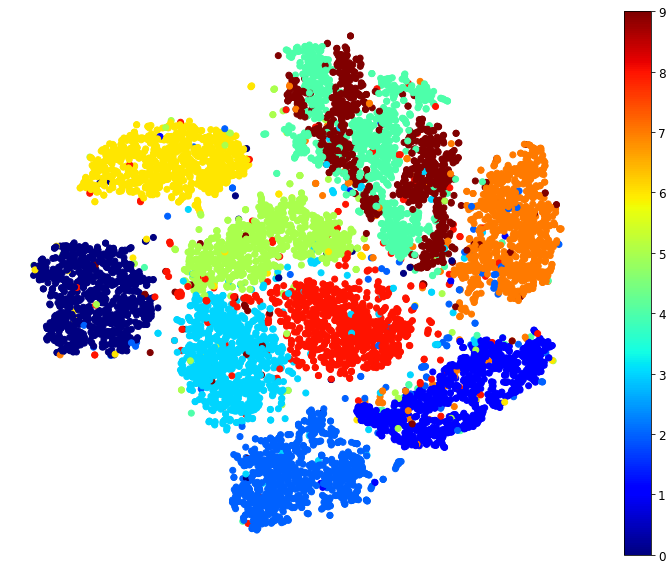

In [89]:
# Now let's use Matplotlib's `scatter()` function to plot a scatterplot, 
# using a different color for each digit:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.astype(int), cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Isn't this just beautiful? :) This plot tells us which numbers are easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on).

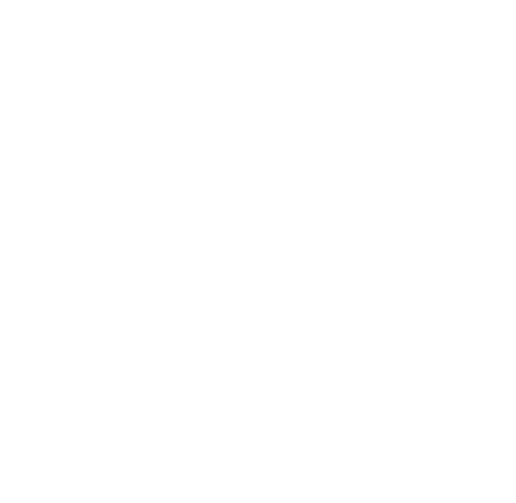

In [102]:
# Let's focus on digits 3 and 5, which seem to overlap a lot.

plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

In [103]:
# Let's see if we can produce a nicer image by running t-SNE on these 3 digits:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)


plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 2 is required.

Much better, now the clusters have far less overlap. But some 3s are all over the place. Plus, there are two distinct clusters of 2s, and also two distinct clusters of 5s. It would be nice if we could visualize a few digits from each cluster, to understand why this is the case. Let's do that now. 

*Exercise: Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits.*

Let's create a `plot_digits()` function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead. This implementation was inspired from one of Scikit-Learn's excellent examples ([plot_lle_digits](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html), based on a different digit dataset).

In [104]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [105]:
# Let's try it! First let's just write colored digits:
plot_digits(X_reduced, y)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 936x720 with 0 Axes>

In [106]:
# Well that's okay, but not that beautiful. Let's try with the digit images:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 2520x1800 with 0 Axes>

In [107]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

NameError: name 'X_subset_reduced' is not defined

*Exercise: Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.*

In [108]:
# Let's start with PCA. We will also time how long it takes:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

PCA took 1.1s.


TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Figure size 936x720 with 0 Axes>

In [ ]:
# Wow, PCA is blazingly fast! But although we do see a few clusters, there's way too much overlap. Let's try LLE:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

In [ ]:
# That took a while, and the result does not look too good. 
# Let's see what happens if we apply PCA first, preserving 95% of the variance:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

The result is more or less the same, but this time it was almost 4× faster.

In [ ]:
# Let's try MDS. 
# It's much too long if we run it on 10,000 instances, so let's just try 2,000 for now:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

In [ ]:
# Meh. This does not look great, all clusters overlap too much. 
# Let's try with PCA first, perhaps it will be faster?
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

Same result, and no speedup: PCA did not help (or hurt).

In [ ]:
# Let's try LDA:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

This one is very fast, and it looks nice at first, until you realize that several clusters overlap severely.

In [ ]:
# Well, it's pretty clear that t-SNE won this little competition, wouldn't you agree? We did not time it, so let's do that now:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

In [ ]:
# It's twice slower than LLE, but still much faster than MDS, and the result looks great. 
# Let's see if a bit of PCA can speed it up:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

Yes, PCA roughly gave us a 25% speedup, without damaging the result. We have a winner!